# Lab Report #2_Pengyun Li

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("GSS.2006.csv")
df.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Qn1. Recode 1 *sort of* continuous variable into categories.  Tell me what you did and explain the variable(s).

I will categorize the variable "hrs1" into 3 levels, i.e., short, medium, and long. Note that "hrs1" refers to the number of hours the respondent worked last week. The range of "hrs1" is from 1 to 89.

I will thus recode the variable "hrs" to:
"short" == "1": 1-30 hours;
"medium" == "2": 31-60 hours;
"long" == "3": 61-89 hours.

In [7]:
conditions = [
    (df['hrs1'] <= 30) ,
    (df['hrs1'] >= 31 ) & (df['attend'] <= 60),
    (df['hrs1'] >= 61)]
choices = [1, 2, 3]
df['hrs_level'] = np.select(conditions, choices, default=np.nan)

In [8]:
df['hrs_level'].describe()

count    2732.000000
mean        1.833455
std         0.374597
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: hrs_level, dtype: float64

In [9]:
df['hrs_level'].value_counts().sort_index()

1.0     457
2.0    2273
3.0       2
Name: hrs_level, dtype: int64

## Qn2. Recode 1 another variable and attach value labels.  Tell me what you did and explain the variable(s).

I will categorize the variable "mntlhlth" into 3 levels, i.e., light, medium, and severe. Note that "mntlhlth" refers to the number of days of poor mental health in the past 30 days for each respondent. The range of "mntlhlth" is from 0 to 30.

I will thus recode the variable "hrs" to: "light"== "1":0-10 days; "medium"== "2": 11-20 days; "severe"== "3": 21-30 days.

In [10]:
conditions = [
    (df['mntlhlth'] <= 10) ,
    (df['mntlhlth'] >= 11 ) & (df['attend'] <= 20),
    (df['mntlhlth'] >= 21)]
choices = [1, 2, 3]
df['mental_severity'] = np.select(conditions, choices, default=np.nan)

In [11]:
df['mental_severity'].describe()

count    1717.000000
mean        1.085614
std         0.281950
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: mental_severity, dtype: float64

In [12]:
df['mental_severity'].value_counts().sort_index()

1.0    1571
2.0     145
3.0       1
Name: mental_severity, dtype: int64

## Qn3. Use one (or both) of your recoded variables to do a cross-tabulation (as you had done last week, with prop.table, doBy, or ddply). Explain your results.



In [13]:
pd.crosstab(df['mental_severity'] ,columns = df['hrs_level'], margins = True)

hrs_level,1.0,2.0,3.0,All
mental_severity,,,,
1.0,259,1271,0,1530
2.0,31,97,0,128
3.0,0,0,1,1
All,290,1368,1,1659


The results showed that for respondents who has worked for short or medium number of hours for the past week, their mental health conditions are less likely to be affected as we can see that the majority of them has light level of poor mental health in the past month. However, when the respondent has worked for a 'long' work hours, he/she has a severe level of poor mental health condition.

## Qn4. Run a linear regression with 1 independent and 1 dependent variable.  Make all of the recodes necessary to make the model as easy to interpret as possible.  And explain your results.

In [16]:
lm = smf.ols(formula = 'rincome~hrs1', data = df).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                rincome   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     307.4
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.19e-64
Time:                        02:39:52   Log-Likelihood:                -5220.7
No. Observations:                2275   AIC:                         1.045e+04
Df Residuals:                    2273   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8953      0.162     48.654      0.0

My dependent variable chosen is "rincome" (respondent's income level) and the independent variable chosen is "hrs1" (the number of hours the respondent worked last week).

As seen from the summary table, we can see that though the p-value is 0.000<0.05, suggesting that the estimated coefficient for variable "hrs" is statistically significant, the estimated coefficient value of 0.0637 implies that  there is almost trivial positive relationship between the number of hours the respondent worked last week and their income level. Besides, an R-squared value of 0.119 suggests that only 11.9% of variation in our dependent variable "rincome" can be explained by the independent variable "hrs1".

## Qn5. Plot two variables, either as a scatter plot or boxplot.  Explain your results.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


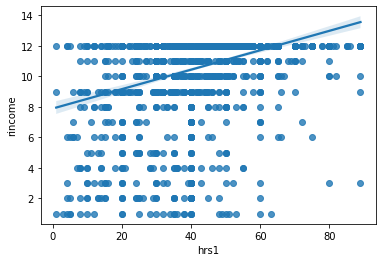

In [21]:
import seaborn as sns

sns.regplot(df['hrs1'],df['rincome'])

The scatter plot above shows that there is a positive relationship between "rincome" and "hrs1", suggesting that when people work for a longer period of time, their income level tends to increase as well.

## Qn6. Tell me two theories/ideas you might want to test in this course. Do you have a dataset for these ideas/theories already? Do you have it in R-readable format already? What is your main independent variable? What is your main dependent variable?  Write it here in this lab report, but ALSO please send me your proposal as an email with the subject "Independent Project Ideas - [your name]" to gme2101@columbia.edu

There are 2 ideas that I would like to test in this course:

1. I would like to investigate on if people who are cyberbullied on social media platforms will become cyberbulliers? I am thinking on conducting a sentiment analysis on Twitter data in orer to define if an individual has been cyberbullied. The main dependent variable will be the number of "bad" comments an individual has posted under others' posts after the time point when himeself/herself has been cyberbullied. The main independent variable can be the number of "bad" comments this individual has received from others, sex, age, etc.  I do not have the datasets yet and do not have it in R-readable format as well.

2. I would like test if there is a correlation between domestic violence and economic growth status of the country. The main dependent variable is the number of domestic violence reported in the country/region very year. The main independent variables are essential economic growth indicators such as GDP, unemployment rate, etc.  I do not have the datasets yet and do not have it in R-readable format as well.
